## Linear Regression

Objectives:
- Understand the basic concepts about linear regression.
- Know how to create a simple linear model using scikit learn.
- Build model to predict home prices in California.



### Basic concepts.

In [9]:
import pandas, seaborn, matplotlib
df = pandas.read_csv('temperature.csv')
df


,year,t,temperature_deviation
0,1991,1,0.29
1,1992,2,0.14
2,1993,3,0.19
3,1994,4,0.26
4,1995,5,0.28
5,1996,6,0.22
6,1997,7,0.43
7,1998,8,0.59
8,1999,9,0.33
9,2000,10,0.29


- Which year has the biggest deviation in temperature?
- What is the average temperature deviation?
- How far does the temperature deviate?
- What's the trend in temperature deviation?

+ Linear regression is about detecting trends.
+ Linear regression is about detecting correlation between two numerical variables.



What is correlation?  a function that describes the relationship between two variables.



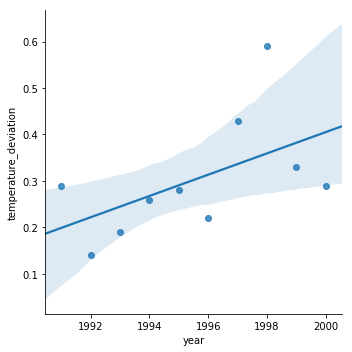

In [10]:
seaborn.lmplot(x='year', y='temperature_deviation', data=df)

Linear regression is about modeling or describing the relationship between two variables using a linear function.

Example of a linear function: y = f(x) = 3x + 5

x is an independent variable.

y is a dependent variable.

In [11]:
df2 = pandas.read_csv('height_weight.csv')
df2

,height,weight
0,65,105
1,65,125
2,62,110
3,67,120
4,69,140
5,65,135
6,61,95
7,67,130


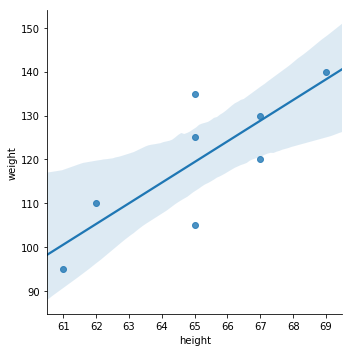

In [13]:
seaborn.lmplot(x='height', y='weight', data=df2)

Correlation is not causation.

We want to find the linear equation $f(t) = \alpha + \beta * t$, which describes the dataset (temperature deviation).  We want to find which values of $\alpha$ and $\beta$ that "best" describe the relationship.


"Best described" means the function f(t) should give the smallest error betweeen the model and the observed data.

We will define the error function between the model and the observed data.

$F(\alpha, \beta) = (\alpha + \beta * t_1 - y_1)^2 + \cdots + (\alpha + \beta * t_{10} - y_{10})^2$

We want to find specific values of $\alpha$ and $\beta$ that give the smallest value of $F(\alpha, \beta)$.

$f(x) = x^2 + 10$.   ${df \over dx} = 2x$

$f(x) = (5x + 10)^2$

${df \over dx} = 2(5x+10) * 5$


${df \over d\alpha} = 2(\alpha + \beta t - y_1)*1 + \cdots$

${df \over d\beta} = 2(\alpha + \beta t - y_1)*t_1 + \cdots$




Review:

- Start with defining an "error" function.
- Take the derivative of the error function.
- Set it to zero to find out the values of $\alpha$ and $\beta$ that gives the minimum point for the quadratic error function.

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = df[['t']]
y = df['temperature_deviation']    # y = df.temperature_deviation
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

X is a dataframe.  It can have multiple variables.  Each variable is in 1 column.



In [21]:
model.intercept_ , model.coef_

(0.176, array([0.02290909]))

In [26]:
def predict(data_points):
    def f(x):
        return 0.176 + 0.02290909*x
    output = []
    for x in data_points:
        output.append(f(x))
    return output

predict([10, 20, 30, 40])


[0.4050909, 0.6341817999999999, 0.8632727, 1.0923635999999999]

In [23]:
df


,year,t,temperature_deviation
0,1991,1,0.29
1,1992,2,0.14
2,1993,3,0.19
3,1994,4,0.26
4,1995,5,0.28
5,1996,6,0.22
6,1997,7,0.43
7,1998,8,0.59
8,1999,9,0.33
9,2000,10,0.29


In [28]:
model.predict([[10],[20],[30],[40]])

array([0.40509091, 0.63418182, 0.86327273, 1.09236364])

In [29]:
model.score(X,y)

0.2922393481248773

In [30]:
iris = pandas.read_csv('~/Dropbox/datasets/iris.csv')

In [31]:
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


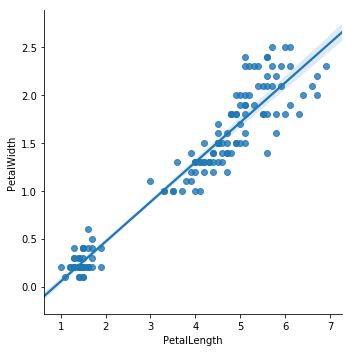

In [32]:
seaborn.lmplot(x='PetalLength', y='PetalWidth', data=iris)

In [34]:
iris[['PetalLength', 'PetalWidth']].sample(3)

,PetalLength,PetalWidth
95,4.2,1.2
111,5.3,1.9
120,5.7,2.3


In [35]:
model = linear_model.LinearRegression()
X = iris[['PetalLength']]
y = iris['PetalWidth']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model.predict([ [4.19], [5.33], [5.65] ])

array([1.37893967, 1.85290085, 1.98594258])

In [38]:
model.score(X,y)

0.9271098389904927